In [2]:
# %matplotlib notebook
from matplotlib import pyplot as plt
import json
import pandas as pd
import numpy as np
import csv

In [11]:
orignal_water_resource_data = "WaterResourcesChinaStatisticalYearbook.jpg"
orignal_water_supply_and_water_use_data = "WaterSupplyAndWaterUseChinaStatisticalYearbook.jpg"
china_water_risk_ecology_report = "china_water_risk_ecology_report.json"
water_resources = "water_resources.json"
water_resources_per_city_2020 = "water_resources_per_city_2020.json"
water_supply_and_water_use_per_city_2020 = "water_supply_and_water_use_per_city_2020.json"
water_supply_and_water_use = "water_supply_and_water_use.json"
water_withdrawals_total = "water_withdrawals_total.csv"
water_withdrawals_pct_of_natrual_resources = "water_withdrawals_pct_of_natrual_resources.csv"
annual_fresh_water_withdrawals = "annual-freshwater-withdrawals.csv"

Text(0.5, 1.0, 'Groundwater and Shallow Groundwater Quality')

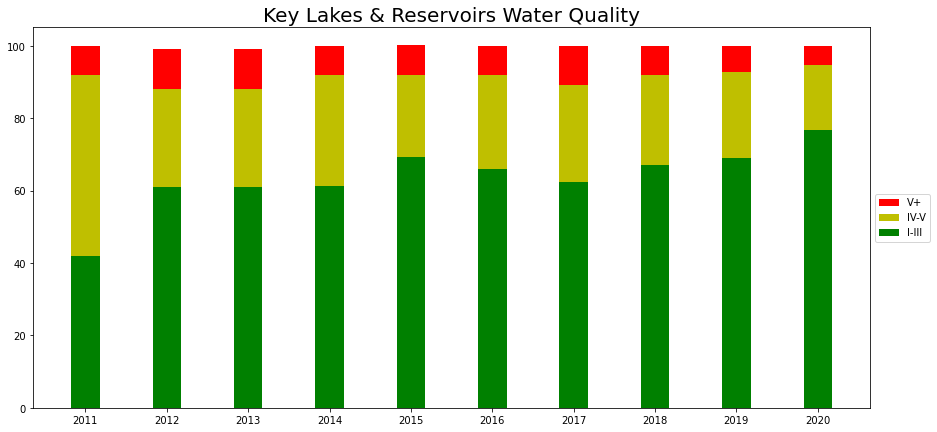

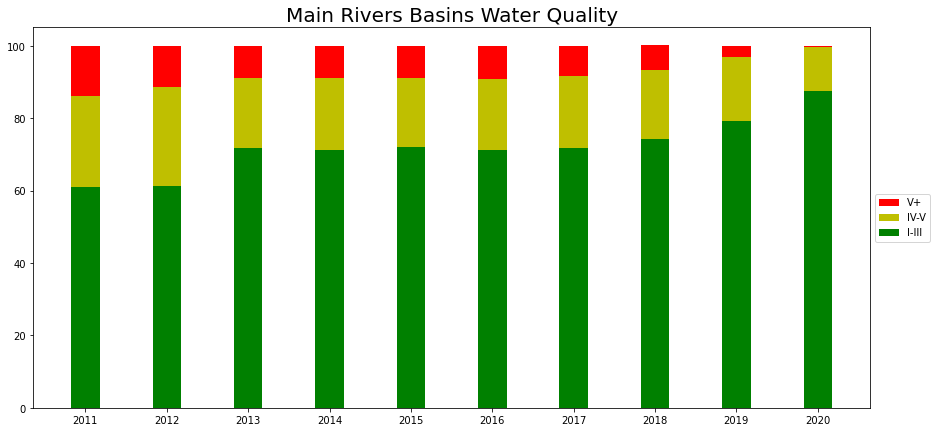

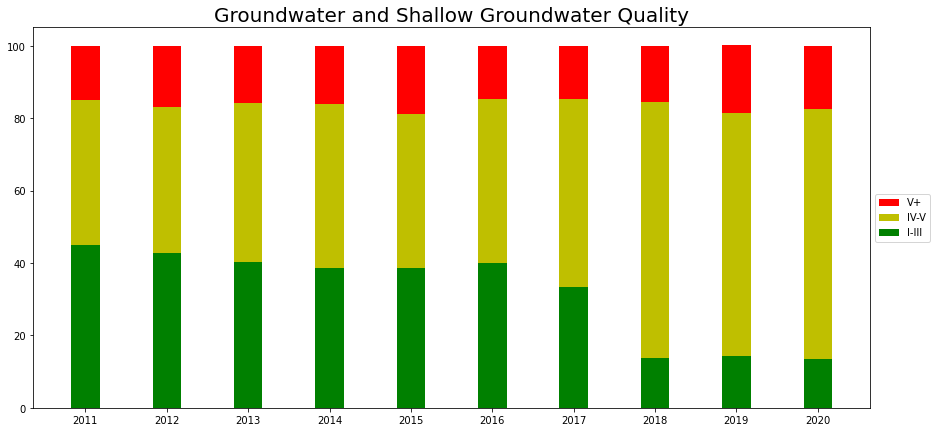

In [4]:

def water_quality_bar_chart(years, worst, bad, good):
    fig, ax = plt.subplots(figsize=(15,7))
    worst, bad, good = np.array(worst), np.array(bad), np.array(good)
    x = np.arange(len(years))  # the label locations
    width = 0.35  # the width of the bars
    rects1 = ax.bar(x, good+worst+bad, width, color='r', label="V+")
    rects2 = ax.bar(x, good+bad, width, color='y', label="IV-V")
    rects3 = ax.bar(x, good, width, color='g', label="I-III")
    ax.set_xticks(x, years)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return fig, ax

with open(china_water_risk_ecology_report, 'r') as f:
    water_quality_data = json.load(f)
sorted(water_quality_data, key= lambda x: x['year'])

years = [x['year'] for x in water_quality_data]

key_lakes_and_reservoirs = [x['Key Lakes & Reservoirs'] for x in water_quality_data]
worst, bad, good = zip(*[(x['V+'], x['IV-V'], x['I-III']) for x in key_lakes_and_reservoirs])
fig, ax = water_quality_bar_chart(years, worst, bad, good)
ax.set_title('Key Lakes & Reservoirs Water Quality', fontsize=20)

main_river_basins = [x['Main River Basins'] for x in water_quality_data]
worst, bad, good = zip(*[(x['V+'], x['IV-V'], x['I-III']) for x in main_river_basins])
fig, ax = water_quality_bar_chart(years, worst, bad, good)
ax.set_title('Main Rivers Basins Water Quality', fontsize=20)

water_quality_data

groundwater_and_shallow_grounwater = [x['Groundwater & shallow groundwater'] for x in water_quality_data]
def remap_data(x):
    if 'Very Bad' in x:
        x = {
            'V+': x['Very Bad'],
            'IV-V': x['Bad'],
            'I-III': x['Satisfactory'] + x['Good'] + x['Excellent'],
        }
    return x
        
groundwater_and_shallow_grounwater = [remap_data(x) for x in groundwater_and_shallow_grounwater]


worst, bad, good = zip(*[(x['V+'], x['IV-V'], x['I-III']) for x in groundwater_and_shallow_grounwater])
fig, ax = water_quality_bar_chart(years, worst, bad, good)
ax.set_title('Groundwater and Shallow Groundwater Quality', fontsize=20)



Text(0.5, 1.0, 'Good Per Capita Water Resources')

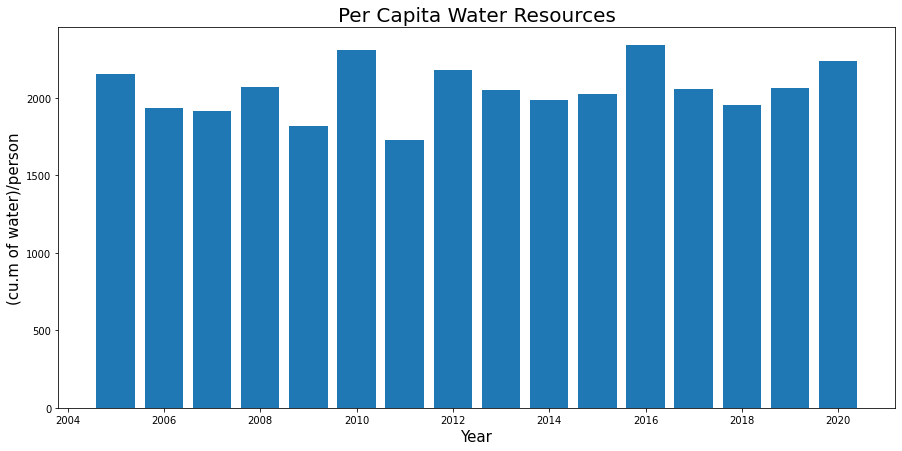

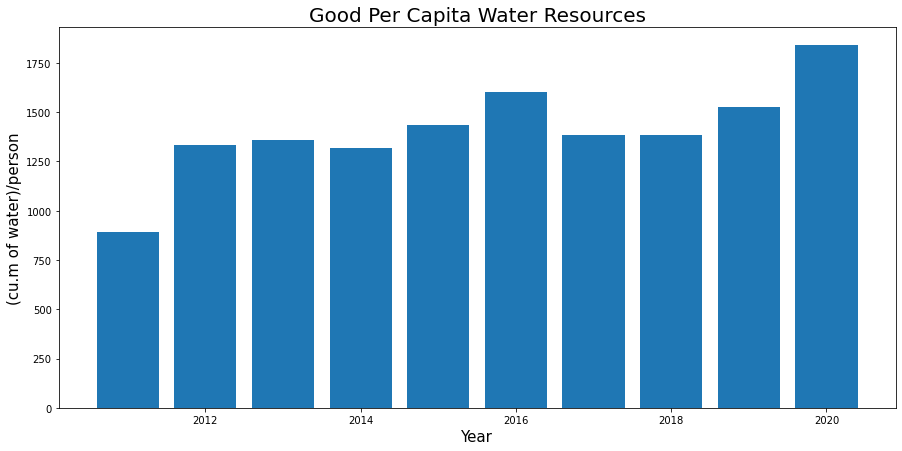

In [5]:

def plot_per_capita_water(years, per_capita_water_resources):
    fig, ax = plt.subplots(figsize=(15,7))
    ax.bar(years, per_capita_water_resources)
    ax.set_xlabel("Year", fontsize=15)
    ax.set_ylabel("(cu.m of water)/person", fontsize=15)
    return fig, ax

with open(water_resources, 'r') as f:
    water_resources_data = json.load(f)
sorted(water_resources_data, key= lambda x: x['year'])


#Trim off 2000
water_resources_data = water_resources_data[1:]

years = [x['year'] for x in water_resources_data]


per_capita_water_resources = np.array([x['Per Capita Water Resources'] for x in water_resources_data])
fig, ax = plot_per_capita_water(years, per_capita_water_resources)
ax.set_title('Per Capita Water Resources', fontsize=20)



key_lakes_and_reservoirs = [x['Key Lakes & Reservoirs'] for x in water_quality_data]
lakes_good = np.array([x['I-III'] for x in key_lakes_and_reservoirs])
main_river_basins = [x['Main River Basins'] for x in water_quality_data]
river_good = np.array([x['I-III'] for x in main_river_basins])
avg_good_pct = ((lakes_good + river_good) / 2) / 100.0

per_capita_water_resources_in_range = [x for i, x in enumerate(per_capita_water_resources) if years[i] > 2010]

fig, ax = plot_per_capita_water(years[-len(per_capita_water_resources_in_range):], per_capita_water_resources_in_range * avg_good_pct)
ax.set_title('Good Per Capita Water Resources', fontsize=20)

Text(0.5, 1.0, 'Per Capita Water Use')

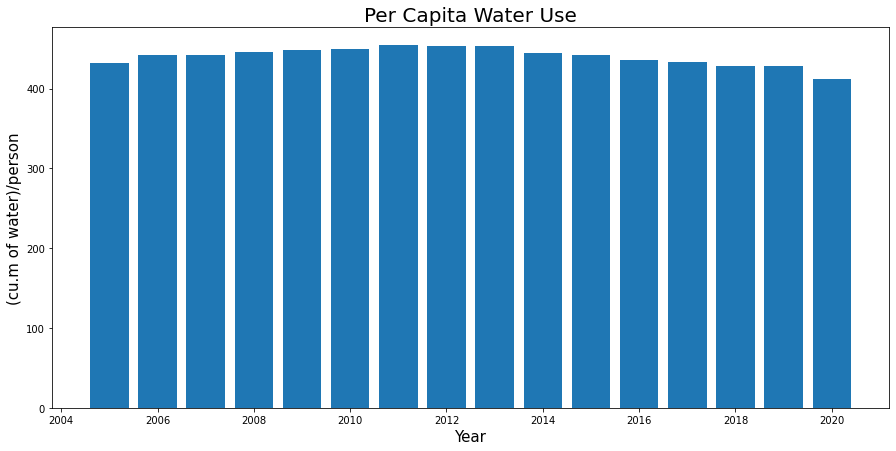

In [6]:
def plot_per_capita_water_use(years, per_capita_water_use):
    fig, ax = plt.subplots(figsize=(15,7))
    ax.bar(years, per_capita_water_use)
    ax.set_xlabel("Year", fontsize=15)
    ax.set_ylabel("(cu.m of water)/person", fontsize=15)
    return fig, ax


with open(water_supply_and_water_use, 'r') as f:
    water_supply_and_water_use_data = json.load(f)
sorted(water_supply_and_water_use_data, key= lambda x: x['year'])

#Cut off year 2000
water_supply_and_water_use_data = water_supply_and_water_use_data[1:]

years = [x['year'] for x in water_supply_and_water_use_data]

per_capita_water_use =  [x['Per Capita Water Use'] for x in water_supply_and_water_use_data]

fix, ax = plot_per_capita_water_use(years, per_capita_water_use)
ax.set_title("Per Capita Water Use", fontsize=20)


Text(0.5, 1.0, 'Water use by Segment')

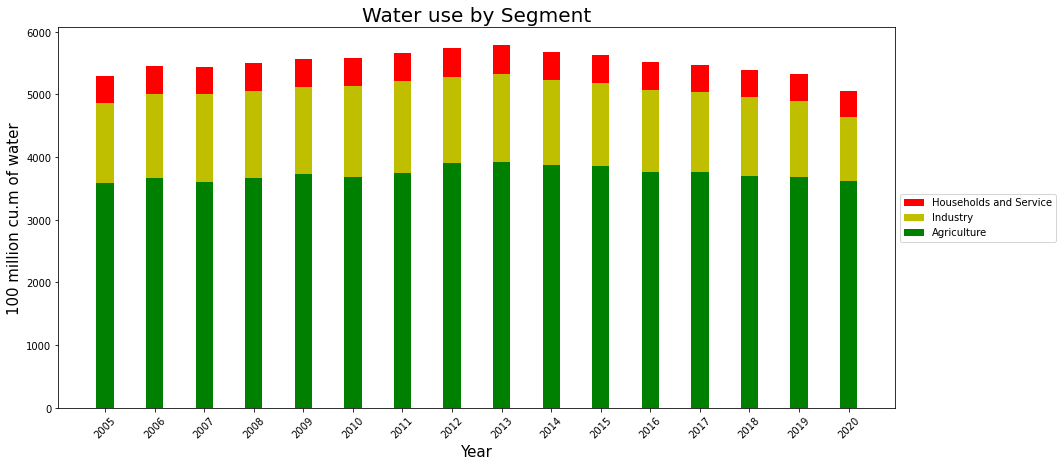

In [7]:

def water_use_bar_chart(years, agriculture, industry, households_service):
    fig, ax = plt.subplots(figsize=(15,7))
    x = np.arange(len(years))  # the label locations
    width = 0.35  # the width of the bars
    rects1 = ax.bar(x, agriculture+industry+households_service, width, color='r', label="Households and Service")
    rects2 = ax.bar(x, agriculture+industry, width, color='y', label="Industry")
    rects3 = ax.bar(x, agriculture, width, color='g', label="Agriculture")
    ax.set_xticks(x, years, rotation=45)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel("Year", fontsize=15)
    ax.set_ylabel("100 million cu.m of water", fontsize=15)
    return fig, ax



years = [x['year'] for x in water_supply_and_water_use_data]


agriculture, industry, households_service = zip(*[(x['Agriculture'], x['Industry'], x['Per Capita Water Use']) for x in water_supply_and_water_use_data])
agriculture, industry, households_service = np.array(agriculture), np.array(industry), np.array(households_service)

fig, ax = water_use_bar_chart(years, agriculture, industry, households_service)
ax.set_title('Water use by Segment', fontsize=20)


['Luxembourg', 'Latvia', 'Lithuania', 'Slovak Republic', 'Slovenia', 'Denmark', 'Israel', 'Czech Republic', 'Estonia', 'Costa Rica', 'Hungary', 'Belgium', 'Portugal', 'Netherlands', 'Greece', 'Poland', 'Australia', 'Korea', 'France', 'Spain', 'Turkey', 'Russia', 'Japan', 'Mexico', 'United States', 'China', 'India']


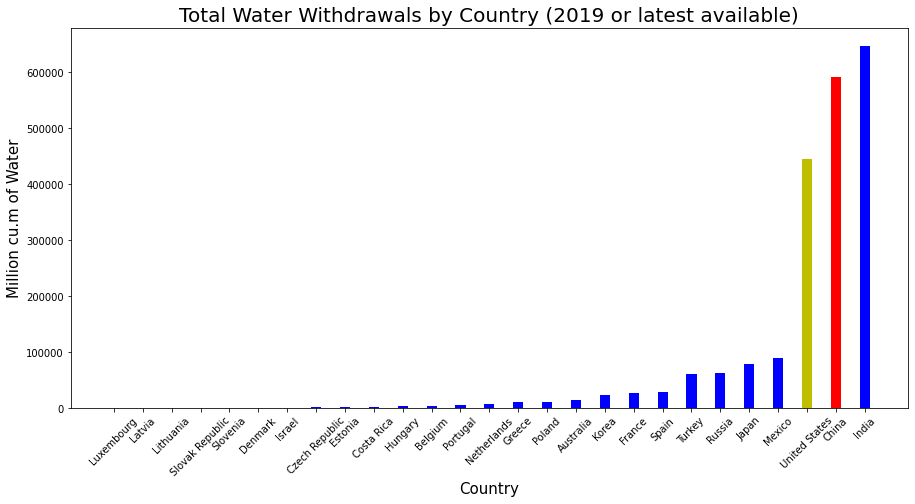

In [8]:
def plot_oecd(oecd_file, insert_values):
    location_key = {
        "OECD":"OECD - Total",
        "OECDE":"OECD - Europe",
        "AUS":"Australia",
        "BEL":"Belgium",
        "BRA":"Brazil",
        "CAN":"Canada",
        "CHE":"Switzerland",
        "CHN":"China",
        "COL":"Colombia",
        "CRI":"Costa Rica",
        "CZE":"Czech Republic",
        "DEU":"Germany",
        "DNK":"Denmark",
        "ESP":"Spain",
        "EST":"Estonia",
        "FIN":"Finland",
        "FRA":"France",
        "GBR":"United Kingdom",
        "GRC":"Greece",
        "HUN":"Hungary",
        "IDN":"Indonesia",
        "IRL":"Ireland",
        "ISL":"Iceland",
        "ISR":"Israel",
        "ITA":"Italy",
        "JPN":"Japan",
        "KOR":"Korea",
        "LTU":"Lithuania",
        "LUX":"Luxembourg",
        "LVA":"Latvia",
        "MEX":"Mexico",
        "NLD":"Netherlands",
        "NOR":"Norway",
        "NZL":"New Zealand",
        "POL":"Poland",
        "PRT":"Portugal",
        "RUS":"Russia",
        "SVK":"Slovak Republic",
        "SVN":"Slovenia",
        "SWE":"Sweden",
        "TUR":"Turkey",
        "USA":"United States",
        "ZAF":"South Africa",
        "IN":"India",
    }

    with open(oecd_file, 'r') as f:
        reader = csv.DictReader(f)
        water_withdrawals_total_data = list(reader)
    
    water_withdrawals_total_data.extend(insert_values)

    for e in water_withdrawals_total_data:
        for key, value in list(e.items()):
            if "LOCATION" in key:
                del e[key]
                e['LOCATION'] = location_key[value]

            if key == 'TIME':
                e[key] = int(value)

            if key == 'Value':
                e[key] = float(value)
                
                
    


    water_withdrawals_total_data_latest_country = {}

    for e in water_withdrawals_total_data:
        if e['LOCATION'] not in water_withdrawals_total_data_latest_country:
            water_withdrawals_total_data_latest_country[e['LOCATION']] = e
        elif water_withdrawals_total_data_latest_country[e['LOCATION']]['TIME'] < e['TIME']:
            water_withdrawals_total_data_latest_country[e['LOCATION']] = e
            

    water_withdrawals_total_data = list(water_withdrawals_total_data_latest_country.values())   
    water_withdrawals_total_data.sort(key=lambda x: x['Value'])


    def water_withdrawals_bar_chart(locations, values):
        fig, ax = plt.subplots(figsize=(15,7))
        x = np.arange(len(locations))
        width = 0.35
        
        def country_colors(c):
            if c == 'China':
                return 'r'
            if c == 'United States':
                return 'y'
            return 'b'
        
        colors = [country_colors(location) for location in locations]
        rects1 = ax.bar(x, values, width, color=colors)
        ax.set_xticks(x, locations, rotation=45)
        ax.set_xlabel("Country", fontsize=15)
        ax.set_ylabel("Million cu.m of Water", fontsize=15)
        return fig, ax

    locations = [x['LOCATION'] for x in water_withdrawals_total_data]
    print(locations)
    values = [x['Value'] for x in water_withdrawals_total_data]

    fig, ax = water_withdrawals_bar_chart(locations, values)
    return fig, ax 

fig, ax = plot_oecd(water_withdrawals_total, [{
    "LOCATION":"USA",
    "Value":"444440",
    "TIME":2017,
}, 
{
    "LOCATION":"IN",
    "Value":"647500",
    "TIME":2017,
},
])
ax.set_title('Total Water Withdrawals by Country (2019 or latest available)', fontsize=20)
None

['Latvia', 'Slovak Republic', 'Lithuania', 'Russia', 'Costa Rica', 'Slovenia', 'Luxembourg', 'Australia', 'Hungary', 'Portugal', 'Denmark', 'OECD - Total', 'Netherlands', 'Czech Republic', 'OECD - Europe', 'Estonia', 'France', 'Greece', 'United States', 'Belgium', 'Poland', 'Japan', 'Mexico', 'China', 'Turkey', 'Spain', 'Korea', 'Israel', 'India']


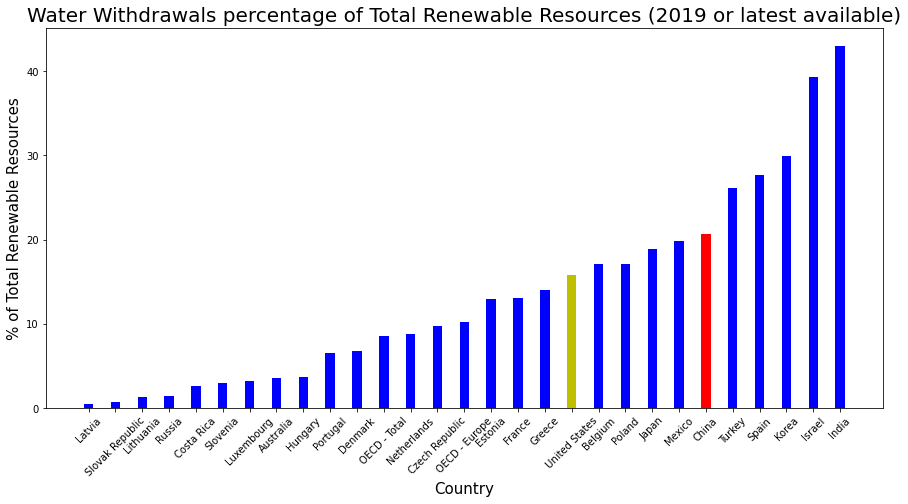

In [9]:
fig, ax = plot_oecd(water_withdrawals_pct_of_natrual_resources, [{
    "LOCATION":"USA",
    "Value":"15.778328",
    "TIME":2017,
},
{
    "LOCATION":"IN",
    "Value":"43",
    "TIME":2017,
}])
ax.set_title('Water Withdrawals percentage of Total Renewable Resources (2019 or latest available)', fontsize=20)
ax.set_ylabel("% of Total Renewable Resources", fontsize=15)
None

['Canada', 'Bangladesh', 'Argentina', 'Iraq', 'Thailand', 'Uzbekistan', 'Turkey', 'Egypt', 'Russia', 'Brazil', 'Japan', 'Vietnam', 'Mexico', 'Philippines', 'Iran', 'Pakistan', 'Indonesia', 'United States', 'China', 'India']


Text(0.5, 1.0, 'Annual Fresh Water Withdrawals by Country (2019 or latest available)')

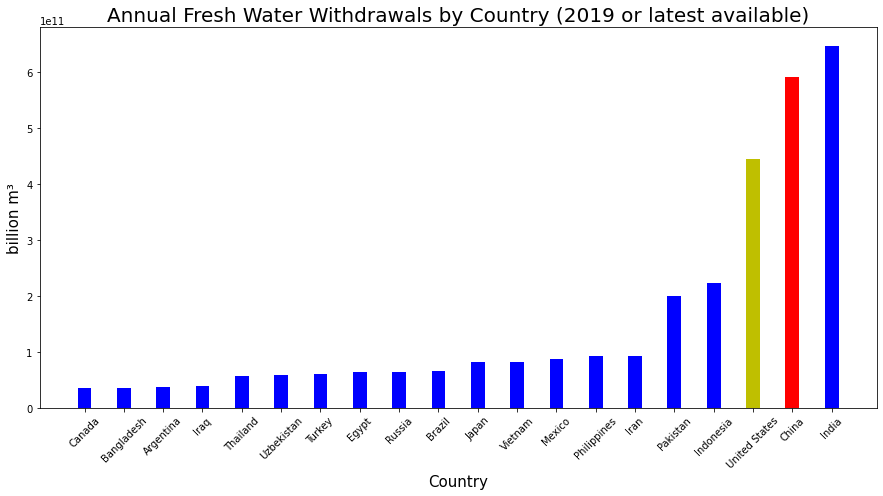

In [46]:
annual_fresh_water_withdrawals


def ourworldindata(infile, value_key):

    with open(infile, 'r') as f:
        reader = csv.DictReader(f)
        annual_fresh_water_withdrawals_data = list(reader)

    # print(annual_fresh_water_withdrawals_data[0])

    for i, e in enumerate(annual_fresh_water_withdrawals_data):
        for k, v in list(e.items()):
            try:
                annual_fresh_water_withdrawals_data[i][k] = int(v)
            except:
                try:
                    annual_fresh_water_withdrawals_data[i][k] = float(v)
                except:
                    pass
                

    # print(annual_fresh_water_withdrawals_data[0])

    annual_fresh_water_withdrawals_data_latest_country = {}

    for e in annual_fresh_water_withdrawals_data:
        if e['Entity'] not in annual_fresh_water_withdrawals_data_latest_country:
            annual_fresh_water_withdrawals_data_latest_country[e['Entity']] = e
        elif annual_fresh_water_withdrawals_data_latest_country[e['Entity']]['Year'] < e['Year']:
            annual_fresh_water_withdrawals_data_latest_country[e['Entity']] = e

    # print(annual_fresh_water_withdrawals_data_latest_country)

    annual_fresh_water_withdrawals_data = list(annual_fresh_water_withdrawals_data_latest_country.values())   
    annual_fresh_water_withdrawals_data.sort(key=lambda x: x[value_key])


    def water_withdrawals_bar_chart(locations, values):
        fig, ax = plt.subplots(figsize=(15,7))
        x = np.arange(len(locations))
        width = 0.35
        
        def country_colors(c):
            if c == 'China':
                return 'r'
            if c == 'United States':
                return 'y'
            return 'b'
        
        colors = [country_colors(location) for location in locations]
        rects1 = ax.bar(x, values, width, color=colors)
        ax.set_xticks(x, locations, rotation=45)
        ax.set_xlabel("Country", fontsize=15)
        ax.set_ylabel("billion m³", fontsize=15)
        return fig, ax

    locations = [x['Entity'] for x in annual_fresh_water_withdrawals_data[-20:]]
    print(locations)
    values = [x[value_key] for x in annual_fresh_water_withdrawals_data[-20:]]

    fig, ax = water_withdrawals_bar_chart(locations, values)
    return fig, ax 

fig, ax = ourworldindata(annual_fresh_water_withdrawals, value_key="Annual freshwater withdrawals, total (billion cubic meters)")
ax.set_title('Annual Fresh Water Withdrawals by Country (2019 or latest available)', fontsize=20)


['Iran', 'Estonia', 'Kyrgyzstan', 'United States', 'Tajikistan', 'Guyana', 'Uzbekistan', 'Chile', 'Iraq', 'Turkmenistan']


Text(0.5, 1.0, 'Total water withdrawal per capita (2019 or latest available)')

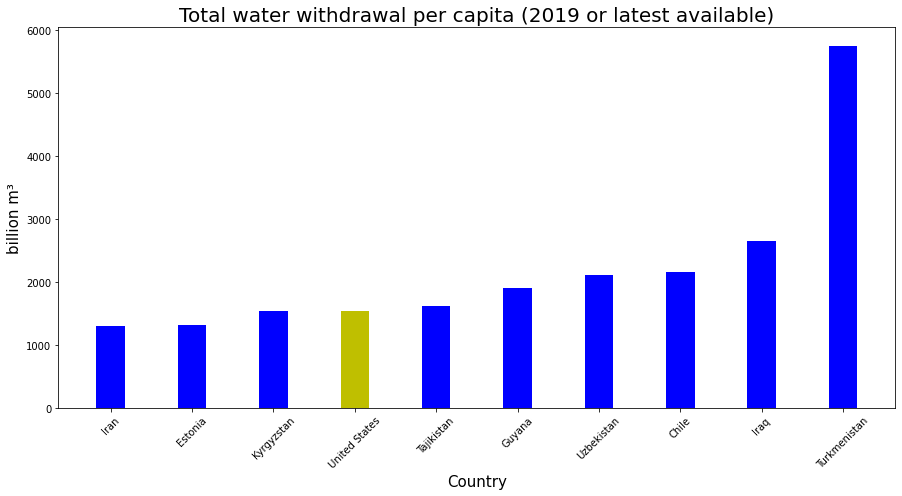

In [45]:
fig, ax = ourworldindata("water-withdrawals-per-capita.csv", value_key="Total water withdrawal per capita")
ax.set_title('Total water withdrawal per capita (2019 or latest available)', fontsize=20)


https://ourworldindata.org/water-use-stress
https://www.fao.org/aquastat/en/overview/methodology/water-resources
